In [1]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [13]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2024-08-13 20:54:12--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 172.67.70.149, 104.26.3.33, 104.26.2.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|172.67.70.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv.3’

insurance.csv.3     100%[===================>]  49.09K  --.-KB/s    in 0.006s  

2024-08-13 20:54:13 (7.86 MB/s) - ‘insurance.csv.3’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [3]:
dataset.dtypes

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
expenses,float64


In [5]:
sex_values = dataset['sex'].unique().tolist()
smoker_values = dataset['smoker'].unique().tolist()
region_values = dataset['region'].unique().tolist()
print(sex_values)
print(smoker_values)
print(region_values)

['female', 'male']
['yes', 'no']
['southwest', 'southeast', 'northwest', 'northeast']


In [14]:
# Create dummy variables

dataset = pd.get_dummies(dataset, columns = ['sex', 'smoker', 'region'], drop_first = True).astype(int)
dataset.head()

,age,bmi,children,expenses,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27,0,16884,0,1,0,0,1
1,18,33,1,1725,1,0,0,1,0
2,28,33,3,4449,1,0,0,1,0
3,33,22,0,21984,1,0,1,0,0
4,32,28,0,3866,1,0,1,0,0


In [15]:
# Split the dataset

from sklearn.model_selection import train_test_split
train_dataset, test_dataset = train_test_split(dataset, test_size = 0.2)

# Create the training and testing labels

train_labels = train_dataset.pop('expenses')
test_labels = test_dataset.pop('expenses')
print(train_dataset)
print(test_dataset)

      age  bmi  children  sex_male  smoker_yes  region_northwest  \
1272   43   25         5         1           0                 0   
634    51   39         1         1           0                 0   
1038   22   28         0         1           0                 0   
38     35   36         1         1           1                 0   
406    33   24         0         0           0                 0   
...   ...  ...       ...       ...         ...               ...   
155    44   39         0         1           0                 1   
1079   63   33         3         1           0                 0   
931    39   32         1         0           0                 0   
1167   29   24         2         0           0                 0   
275    47   26         2         0           0                 0   

      region_southeast  region_southwest  
1272                 1                 0  
634                  0                 1  
1038                 0                 0  
38         

In [16]:
train_dataset.describe()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
count,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000
mean,38.966355,30.359813,1.085981,0.506542,0.191589,0.237383,0.274766,0.242056
std,14.083035,6.173851,1.207278,0.500191,0.393735,0.425678,0.446605,0.428528
min,18.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,35.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,64.000000,53.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
train_labels.describe()

,expenses
count,1070.000000
mean,12846.207477
std,11816.559033
min,1121.000000
25%,4538.000000
50%,8954.500000
75%,15826.000000
max,63770.000000


In [53]:
# Create the model

model = keras.Sequential([
    layers.Input(shape = (train_dataset.shape[1],)),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(1)
])

model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_37 (Dense)                     │ (None, 64)                  │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,121 (51.25 KB)

 Trainable params: 13,121 (51.25 KB)

 Non-trainable params: 0 (0.00 B)

In [56]:
# Train the model

model.compile(optimizer = 'adam',
              loss = 'mse',
              metrics = ['mae', 'mse'])
model.fit(train_dataset, train_labels, epochs = 200, verbose = 0)

9/9 - 0s - 41ms/step - loss: 29676622.0000 - mae: 3011.0447 - mse: 29676622.0000
Testing set Mean Abs Error: 3011.04 expenses
You passed the challenge. Great job!
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


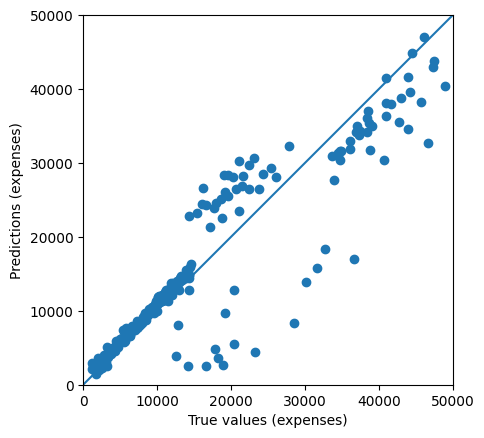

In [57]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
